# SQL Homework Bonus
* Import SQL database into Pandas.
* Create bar chart of average salary by title.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
from JAK import logs

In [2]:
# setup connection to PostgreSQL
engine = create_engine(f'postgresql://{logs}@localhost:5432/sql_homework')
conn = engine.connect()

In [3]:
# pull out tables for titles and salaries
title_df = pd.read_sql('SELECT * FROM titles', conn)
salary_df = pd.read_sql('SELECT * FROM salaries', conn)

In [4]:
title_df.head(2)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01


In [5]:
salary_df.head(2)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03


In [6]:
# associate salary to title (per employee by emp_no)
pay_df = pd.merge(title_df, salary_df, on='emp_no')
pay_df.head(2)

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10001,Senior Engineer,1986-06-26,9999-01-01,60117,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,9999-01-01,65828,1996-08-03,1997-08-03


In [7]:
# group by title and sort descending for visualization preference purposes in bar chart
pay_by_title_df = round(pay_df.groupby('title').mean(), 2)
pd.options.display.float_format = '${:,.2f}'.format
high_to_low_df = pay_by_title_df.sort_values('salary', ascending = False).drop('emp_no', axis = 1).reset_index()
high_to_low_df

,title,salary
0,Senior Staff,"$58,503.29"
1,Staff,"$58,465.27"
2,Manager,"$51,531.04"
3,Technique Leader,"$48,580.51"
4,Engineer,"$48,539.78"
5,Senior Engineer,"$48,506.75"
6,Assistant Engineer,"$48,493.20"


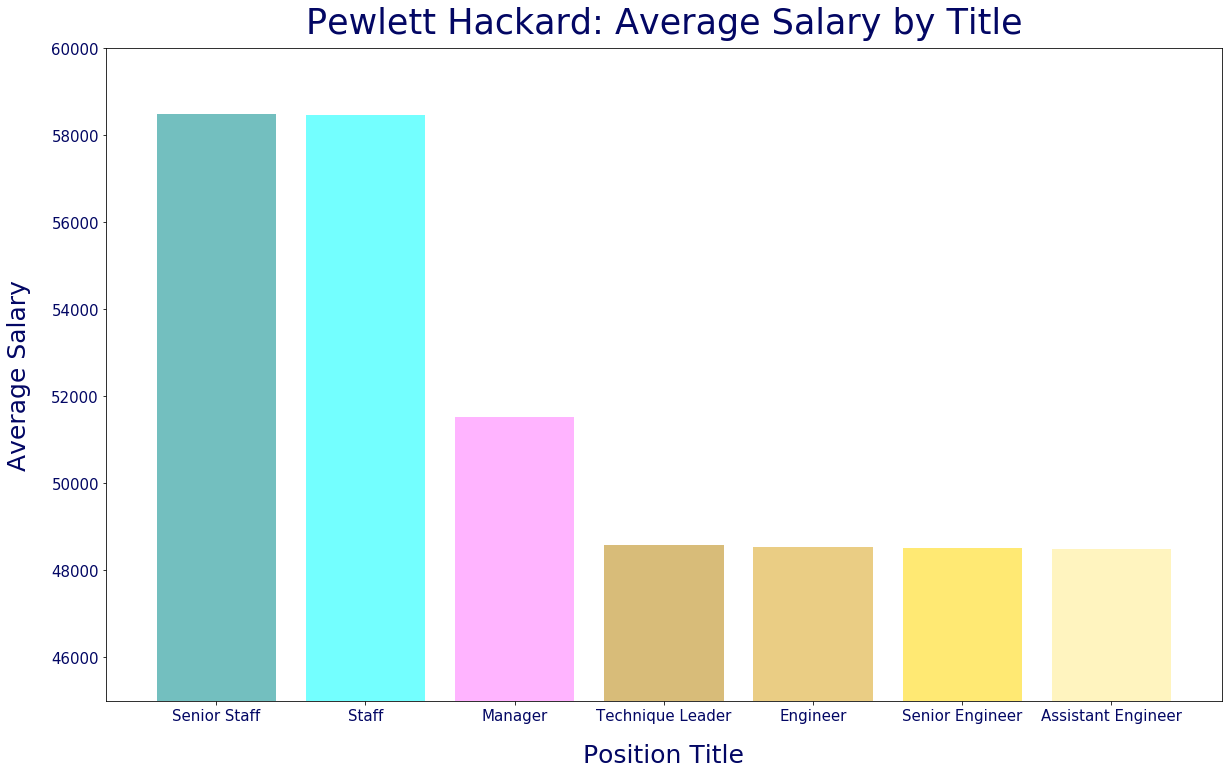

In [9]:
# BUILD BAR CHART

plt.figure(figsize = (20, 12))

colors = (['#008B8B',  # Dark Cyan
           '#00FFFF',  # Cyan
           '#FF77FF',  # Light Magenta
           '#B8860B',  # Dark Goldenrod
           '#DAA520',  # Goldenrod
           '#FFD700',  # Gold
           '#FFEC8B']) # Light Goldenrod

# plot data
ax = plt.bar(high_to_low_df['title'],
        high_to_low_df['salary'], 
        align = "center",
        alpha = 0.55,
        color = colors)

# title and label
plt.title('Pewlett Hackard: Average Salary by Title', fontsize = 35, pad = 15, color = 'xkcd:darkblue')
plt.xlabel('Position Title', fontsize = 25, labelpad = 20, color = 'xkcd:darkblue')
plt.xticks(fontsize = 15, color = 'xkcd:darkblue')
plt.ylabel('Average Salary', fontsize = 25, labelpad = 20, color = 'xkcd:darkblue')
plt.yticks(fontsize = 15, color = 'xkcd:darkblue')
plt.ylim (45000, 60000)

# save and display image
plt.savefig('Images/Avg_Salary_by_Title.png')
plt.show()